DATA1030 Final Project

My object through this project is to develop a classifier to predict whether a customer will churn for a subscription-based service based on their usage data. Customer churn, the rate at which customers cancel their subscriptions, is a vital metric for businesses offering subscription services. Predictive analytics techniques are employed to anticipate which customers are likely to churn, enabling companies to take proactive measures for customer retention.

### EDA

In [3]:
import pandas as pd
df = pd.read_csv('data/churn.csv')
df.head()
df.describe

<bound method NDFrame.describe of         AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0               20       11.055215    221.104302          Premium   
1               57        5.175208    294.986882            Basic   
2               73       12.106657    883.785952            Basic   
3               32        7.263743    232.439774            Basic   
4               57       16.953078    966.325422          Premium   
...            ...             ...           ...              ...   
243782          77        9.639902    742.272460            Basic   
243783         117       13.049257   1526.763053          Premium   
243784         113       14.514569   1640.146267          Premium   
243785           7       18.140555    126.983887          Premium   
243786          90       11.593774   1043.439704          Premium   

           PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0           Mailed check               No        Both         

In [4]:
df_des= pd.read_csv('data/data_descriptions.csv')

df_des

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly ba...
2,TotalCharges,Feature,float,The total charges incurred by the user over th...
3,SubscriptionType,Feature,object,The type of subscription chosen by the user (B...
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paper...
6,ContentType,Feature,string,The type of content preferred by the user (Mov...
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the s...
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV,..."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching c...


This is a data set containing 243781 observation and 20 features in addition to the target variable "Churn".


In [5]:
# there is no missing value

print(df.isnull().sum())

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


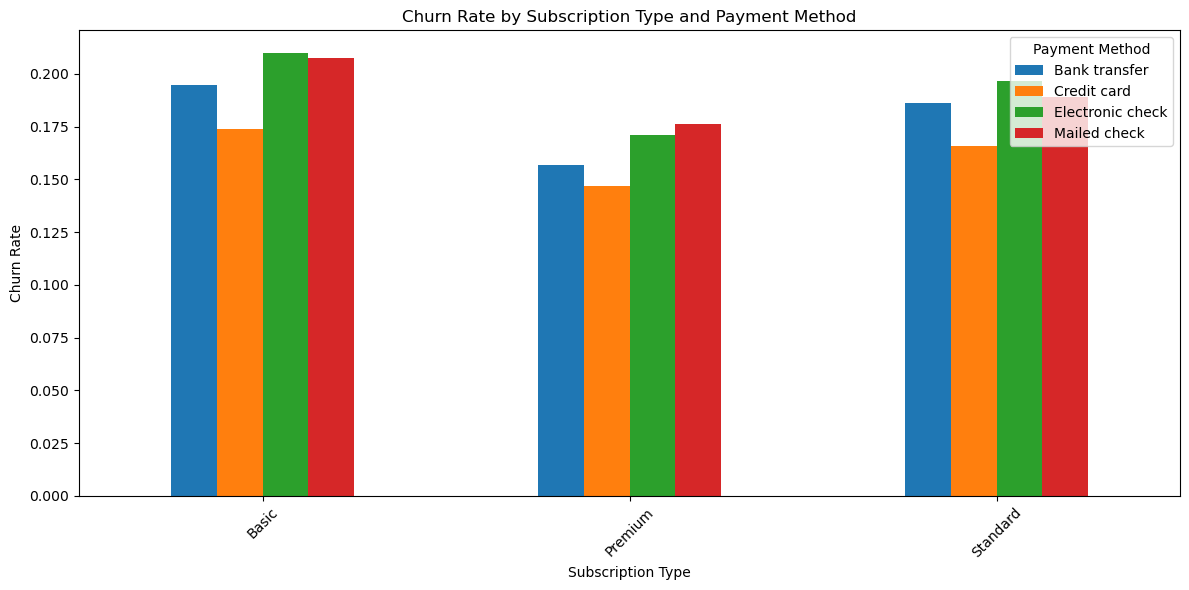

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate churn rate
churn_rate = df.groupby(['SubscriptionType', 'PaymentMethod'])['Churn'].mean().unstack()

# Create the plot
churn_rate.plot(kind='bar', figsize=(12, 6))
plt.title('Churn Rate by Subscription Type and Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Subscription Type')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

This plot shows the churn rate across different subscription types and payment methods. 

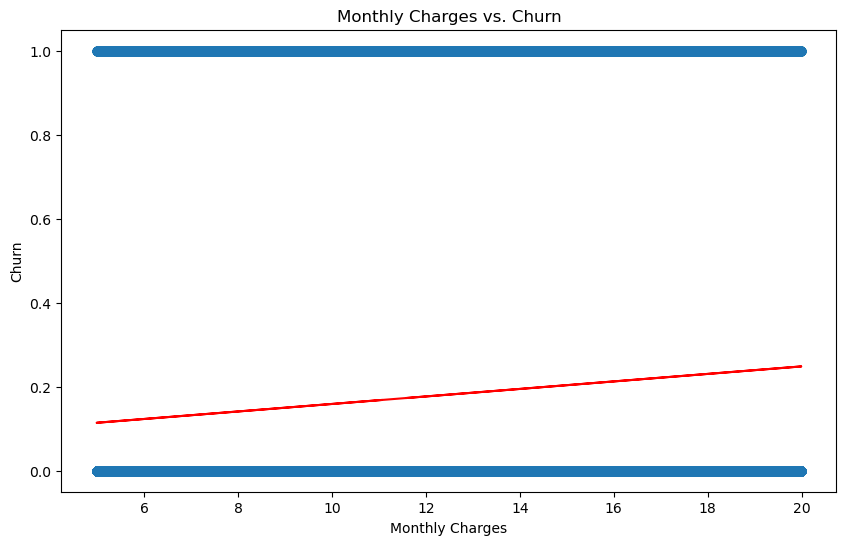

In [7]:
import numpy as np

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['MonthlyCharges'], df['Churn'], alpha=0.5)

# Fit logistic regression
x = df['MonthlyCharges']
y = df['Churn']
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color='red')

plt.title('Monthly Charges vs. Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()
# box plot/violine plot

This plot visualizes the relationship between monthly charges and churn with a fitted logistic regression line.

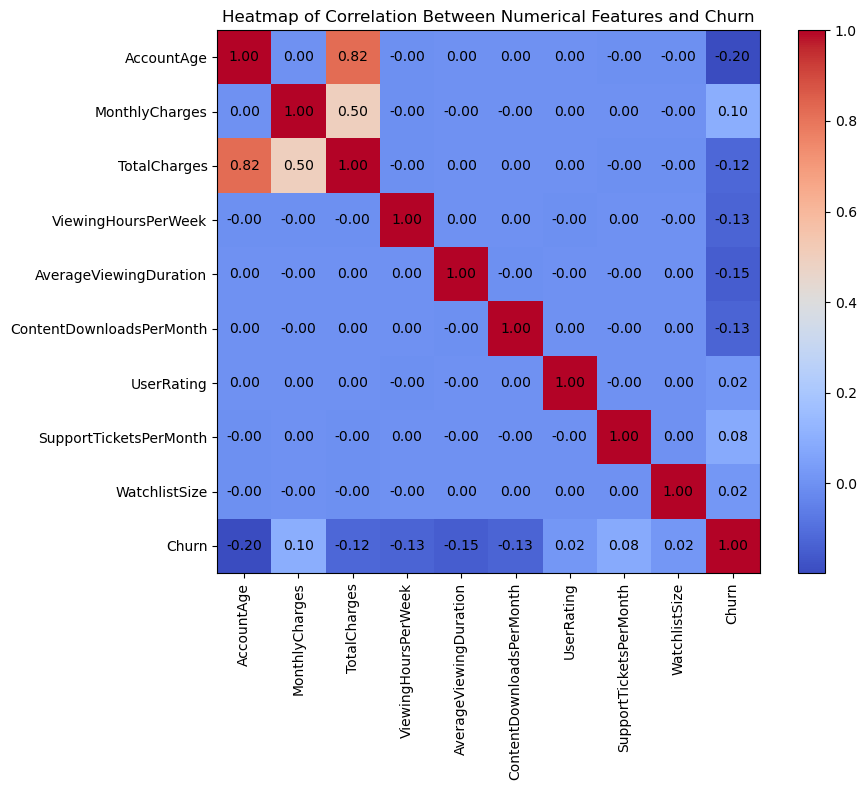

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select only numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap focusing on features related to churn
plt.figure(figsize=(10, 8))
cax = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add a colorbar
plt.colorbar(cax)

# Set ticks and labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add title
plt.title('Heatmap of Correlation Between Numerical Features and Churn')

# Annotate the heatmap with the correlation values
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

# feature 之间的correlation怎么办
# user rating is ordinal data, can it be included in the heat map?
# user rating 在data里有小数点？所以不是ordinal data
#建议我把user rating改成ordinal吗？让data process的步骤更复杂
# 画哪些图？画和target var最有关系的feature的plot


In [9]:

y = df["Churn"]
X= df.loc[:, df.columns != 'Churn']
print(y.value_counts())

Churn
0    199605
1     44182
Name: count, dtype: int64


Around 22% of the observations has the Churn value of 1, which means only 22% of the users would cancel their subscriptions. This is an imbalanced data, thus I would use StratifiedKFold strategy to split the data set.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

random_state = 42

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
# very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance with stratification:**
(array([0, 1]), array([119763,  26509]))
(array([0, 1]), array([39921,  8836]))
(array([0, 1]), array([39921,  8837]))


**Preprocessing**

In [11]:
from sklearn.preprocessing import OneHotEncoder
categorical_vars = df.select_dtypes(include=['object', 'string'])
ftrs = categorical_vars.columns.tolist()
print(ftrs)

# initialize the encoder
enc = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore') # by default, OneHotEncoder returns a sparse ma

# do all of this in one step
X_train_ohe = enc.fit_transform(X_train)
print('X_train transformed')
print(X_train_ohe)
# transform X_test
X_test_ohe = enc.transform(X_test)
print('X_test transformed')
print(X_test_ohe)
# transform X_val
X_val_ohe = enc.transform(X_val)
print('X_val transformed')
print(X_val_ohe)

['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']
X_train transformed
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_test transformed
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_val transformed
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
from sklearn.preprocessing import StandardScaler
numerical_features = X.select_dtypes(include=['number'])
std_ftrs = numerical_features.columns.tolist()
print(std_ftrs)
scaler = StandardScaler()
print(scaler.fit_transform(X_train_ohe[std_ftrs])) #这里是X_train还是X_train_ohe
print(scaler.transform(X_test_ohe[std_ftrs]))
print(scaler.transform(X_val_ohe[std_ftrs]))

['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
[[ 0.49704848 -0.2514938   0.24554554 ...  0.43868658  0.52177609
  -0.56160726]
 [-0.43622195  0.77943336 -0.06829577 ... -1.57852591 -0.52483376
  -0.1447338 ]
 [-1.16533948  1.46237433 -0.71348461 ... -0.65717684 -0.17596381
   1.38380223]
 ...
 [-0.37789255  1.10619221  0.11939132 ...  0.65767868  0.87064604
   1.66171788]
 [ 0.26373087 -1.48627593 -0.63359464 ...  1.59624882 -1.22257366
   1.52276006]
 [-1.57364529  0.58484276 -1.26069855 ...  0.71894195  1.56838594
  -0.97848072]]
[[ 1.226166    0.69535472  1.58939393 ... -0.21954044 -0.87370371
   0.13318185]
 [ 1.3136601  -1.54290029 -0.26569229 ... -1.21453354  0.17290614
  -0.28369162]
 [ 1.05117779 -0.47742258  0.48032705 ...  1.01818786  1.56838594
  -1.25639637]
 ...
 [ 0.46788377  1.1845152   1.1264884  ...  1.68063244  0.17290614
   1.383802

: 

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# PIP 1

** before smote**

In [32]:


def stratified_f1_pipeline(feature_matrix, target_variable, preprocessor, ml_algorithm, param_grid):
    """
    Perform a machine learning pipeline with StratifiedKFold and F1 score as the evaluation metric.

    Parameters:
        feature_matrix (pd.DataFrame): Unprocessed feature matrix.
        target_variable (pd.Series): Target variable (imbalanced).
        preprocessor (ColumnTransformer): Preprocessor for ordinal, categorical, and numerical features.
        ml_algorithm (sklearn estimator): Initialized machine learning algorithm.
        param_grid (dict): Parameter grid for GridSearchCV.

    Returns:
        best_models (list): List of 10 best models from different random states.
        test_scores (list): List of 10 test scores corresponding to the models.
    """
    best_models = []
    test_scores = []

    for random_state in range(2):
        # Split the data into training+validation (80%) and test (20%) sets
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            feature_matrix, target_variable, test_size=0.2, stratify=target_variable, random_state=random_state
        )

        # StratifiedKFold setup
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

        # Clone the ML algorithm to ensure it's reinitialized for each iteration
        ml_algorithm_clone = clone(ml_algorithm)

        # GridSearchCV with cross-validation
        grid_search = GridSearchCV(
            estimator=ml_algorithm_clone,
            param_grid=param_grid,
            scoring='f1',  # F1 score as the evaluation metric
            cv=skf,
            n_jobs=-1,
            verbose=1
        )

        # Preprocess and train the model with GridSearchCV
        X_train_val_transformed = preprocessor.fit_transform(X_train_val)
        grid_search.fit(X_train_val_transformed, y_train_val)

        # Retrieve the best model
        best_model = grid_search.best_estimator_
        # Test the best model
        X_test_transformed = preprocessor.transform(X_test)

        # Use transformed test data for predictions
        y_test_pred = best_model.predict(X_test_transformed)
        test_score = f1_score(y_test, y_test_pred)

        # Store results
        best_models.append(best_model)
        test_scores.append(test_score)
        print(f"\nRandom State: {random_state}")
        print(f"Shapes - X_other: {X_train_val.shape}, X_test: {X_test.shape}")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Test F1 score: {test_score}")
    print("\nSummary of Test Scores:")
    print(f"Mean F1 score: {np.mean(test_scores)}")
    print(f"Standard Deviation of F1 score: {np.std(test_scores)}")

    return best_models, test_scores




**after smote** (I used hybrid resampling technique)

In [ ]:

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.base import clone
from sklearn.metrics import f1_score
import numpy as np

def stratified_f1_pipeline(feature_matrix, target_variable, preprocessor, ml_algorithm, param_grid):
    """
    Perform a machine learning pipeline with StratifiedKFold and F1 score as the evaluation metric,
    including hybrid resampling (SMOTE + ENN).

    Parameters:
        feature_matrix (pd.DataFrame): Unprocessed feature matrix.
        target_variable (pd.Series): Target variable (imbalanced).
        preprocessor (ColumnTransformer): Preprocessor for ordinal, categorical, and numerical features.
        ml_algorithm (sklearn estimator): Initialized machine learning algorithm.
        param_grid (dict): Parameter grid for GridSearchCV.

    Returns:
        best_models (list): List of the best models from different random states.
        test_scores (list): List of test scores corresponding to the models.
    """
    best_models = []
    test_scores = []

    # Initialize SMOTEENN for hybrid resampling
    smote_enn = SMOTEENN(random_state=42)

    for random_state in range(2):  # Change to 10 if you need more iterations
        # Split the data into training+validation (80%) and test (20%) sets
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            feature_matrix, target_variable, test_size=0.2, stratify=target_variable, random_state=random_state
        )

        # Apply SMOTEENN on the training+validation set
        X_train_val_resampled, y_train_val_resampled = smote_enn.fit_resample(X_train_val, y_train_val)

        # StratifiedKFold setup
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

        # Clone the ML algorithm to ensure it's reinitialized for each iteration
        ml_algorithm_clone = clone(ml_algorithm)

        # GridSearchCV with cross-validation
        grid_search = GridSearchCV(
            estimator=ml_algorithm_clone,
            param_grid=param_grid,
            scoring='f1',  # F1 score as the evaluation metric
            cv=skf,
            n_jobs=-1,
            verbose=1
        )

        # Preprocess and train the model with GridSearchCV
        X_train_val_resampled_transformed = preprocessor.fit_transform(X_train_val_resampled)
        grid_search.fit(X_train_val_resampled_transformed, y_train_val_resampled)

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Transform the test set and evaluate
        X_test_transformed = preprocessor.transform(X_test)
        y_test_pred = best_model.predict(X_test_transformed)
        test_score = f1_score(y_test, y_test_pred)

        # Store results
        best_models.append(best_model)
        test_scores.append(test_score)
        print(f"\nRandom State: {random_state}")
        print(f"Shapes - Resampled X_train_val: {X_train_val_resampled.shape}, X_test: {X_test.shape}")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Test F1 score: {test_score}")

    print("\nSummary of Test Scores:")
    print(f"Mean F1 score: {np.mean(test_scores)}")
    print(f"Standard Deviation of F1 score: {np.std(test_scores)}")

    return best_models, test_scores

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')



df = pd.read_csv('data/churn.csv')
df_sampled = df.sample(n=200, random_state=42)
y = df_sampled["Churn"]
X= df_sampled.loc[:, df.columns != 'Churn']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define column types
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
ordinal_features = ['SubscriptionType']
categorical_features = ['PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']

# Define the order for ordinal features
subscription_order = [['Basic', 'Standard', 'Premium']]

# Define preprocessors for numerical, ordinal, and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=subscription_order), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

param_grids = {
    'logistic_lasso': {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of alpha)
        'penalty': ['l1'],  # Lasso penalty
        'solver': ['liblinear', 'saga']  # Solvers that support L1 penalty
    },
    'logistic_ridge': {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l2'],  # Ridge penalty
        'solver': ['lbfgs', 'saga']  # Solvers that support L2 penalty
    },
    'random_forest': {
        'n_estimators': [50, 100, 200],  # Number of trees
        'max_depth': [None, 10, 20, 30],  # Depth of trees
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf node
    },
    'svm': {
        'C': [0.1, 1, 10, 100],  # Regularization strength
        'kernel': ['linear', 'rbf'],  # Linear or RBF kernel
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for RBF
    },
    'xgboost': {
        'n_estimators': [50, 100, 200],  # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
        'max_depth': [3, 5, 7],  # Maximum depth of trees
        'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
        'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
    }
}



models = {
    'logistic_lasso': LogisticRegression(max_iter=3000),
    'logistic_ridge': LogisticRegression(max_iter=3000),
    'random_forest': RandomForestClassifier(),
    'svm': SVC(probability=True),
    'xgboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    print(f"\nTraining model: {model_name}\n{'=' * 60}")
    best_models, test_scores = stratified_f1_pipeline(X, y, preprocessor, model, param_grids[model_name])


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [27]:
best_models

[SVC(C=10, gamma='auto', kernel='linear', probability=True),
 SVC(C=0.1, probability=True),
 SVC(C=1, probability=True),
 SVC(C=0.1, probability=True),
 SVC(C=0.1, probability=True)]

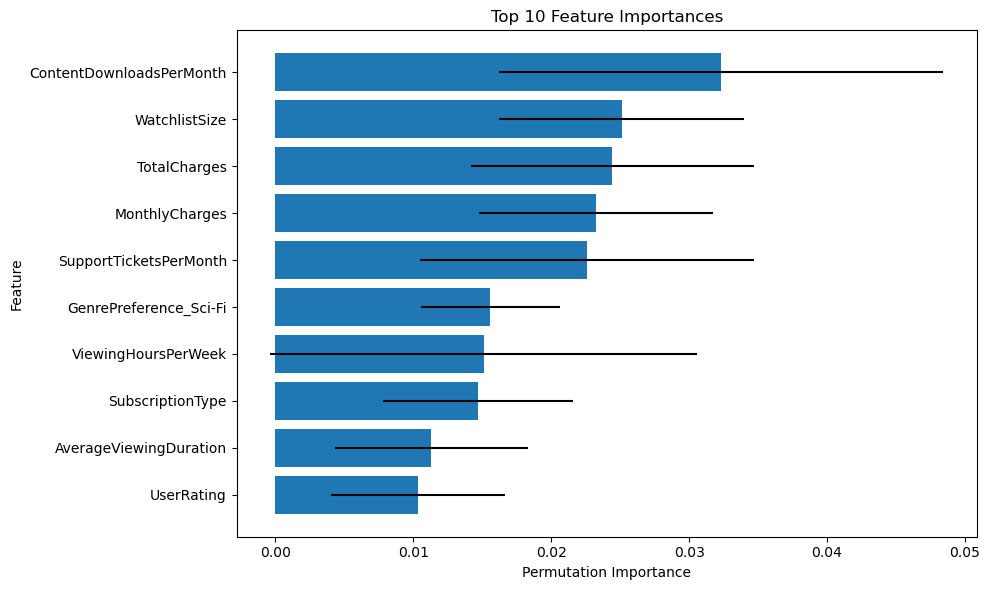

In [6]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit the preprocessor on the training data
preprocessor.fit(X_train_val)

# Transform both training and test data
X_train_val_transformed = preprocessor.transform(X_train_val)
X_test_transformed = preprocessor.transform(X_test)

# Convert sparse matrices to dense arrays
X_train_val_transformed = X_train_val_transformed.toarray()
X_test_transformed = X_test_transformed.toarray()

# Assuming logistic_ridge is the best model
best_logistic_ridge = best_models[list(models.keys()).index('logistic_ridge')]

# Compute permutation importance
perm_importance = permutation_importance(
    best_logistic_ridge,
    X_test_transformed,
    y_test,
    scoring='neg_log_loss',
    n_repeats=30,
    random_state=42,
)

# Get the top 10 most important features
sorted_idx = perm_importance.importances_mean.argsort()[-10:][::-1]

# Map column names to the transformed features
feature_names = numerical_features + ordinal_features + list(preprocessor.transformers_[2][1].get_feature_names_out())
top_features = np.array(feature_names)[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



The black lines on each bar represent the error bars, which indicate the variability or uncertainty of the feature importance scores. These are calculated as the standard deviation of the permutation importance scores over multiple repetitions (e.g., 10 repetitions in this case).

Explanation:
Mean importance: The height of each bar represents the average importance of a feature across the permutations.
Error bar (black line): The black line spans one standard deviation above and below the mean importance. It shows how consistent or variable the importance score is across the permutations.
Purpose:
Features with smaller error bars have more consistent importance scores, indicating the model's reliance on them is stable.
Features with larger error bars have less consistent importance scores, suggesting variability in how the model depends on them.

Let's take a look at some specific data points with indices 0, 100, and 200. For each data point, create a force plot and
describe in a paragraph or two which features contribute positively and negatively to the prediction.

In [26]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'grid_search.best_estimator_' is the fitted model
# Assuming 'preprocessor' is the preprocessor used for data transformation
# And 'X_test' is the test data split

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Create a SHAP explainer for the model
explainer = shap.Explainer(best_model, X_test_transformed)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_transformed)

# Force plot for a specific prediction (local feature importance for one instance)
shap.initjs()  # Enable visualization in Jupyter notebooks

# Visualize SHAP for the first instance in the test set
instance_index = 0  # Change this to visualize other instances
shap.force_plot(explainer.expected_value[1], shap_values.values[instance_index], X_test_transformed[instance_index])

# Additional plots if desired
# SHAP Waterfall plot for detailed breakdown of one instance
shap.plots.waterfall(shap_values[instance_index])




DimensionError: The passed data does not match the background shape expected by the masker! The data of shape (1, 196) was passed while the masker expected data of shape (196,).

In [15]:
import shap
import matplotlib.pyplot as plt

# Convert X_test_transformed to dense format if needed
X_test_transformed_dense = X_test_transformed.toarray()

# Use a small sample of the data to initialize the explainer (SHAP requires a background dataset)
background = X_test_transformed_dense[:50]

# Create the SHAP explainer
explainer = shap.KernelExplainer(best_model.predict_proba, background)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_transformed_dense)

# Summary plot of SHAP values (global importance of features)
shap.summary_plot(
    shap_values[1],  # SHAP values for the positive class
    X_test_transformed_dense,
    feature_names=numerical_features + ordinal_features + list(preprocessor.transformers_[2][1].get_feature_names_out())
)

# Force plot for a specific prediction (e.g., index 0)
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],  # For the positive class
    shap_values[1][0],  # SHAP values for index 0
    feature_names=numerical_features + ordinal_features + list(preprocessor.transformers_[2][1].get_feature_names_out())
)



  0%|          | 0/40 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [28]:
import shap
import matplotlib.pyplot as plt

# Ensure the model is logistic regression and preprocessed test data is ready
assert isinstance(best_model, LogisticRegression), "The model is not a LogisticRegression instance."

# Transform the test data to dense format if necessary
X_test_dense = X_test_transformed.toarray()

# Initialize the SHAP Linear Explainer
explainer = shap.LinearExplainer(best_models, X_test_dense)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_dense)

# Select specific indices for local explanations (e.g., 0, 100, and 200)
indices = [0, 100, 200]
for idx in indices:
    print(f"Force Plot for Index {idx}")
    
    # Force plot for a specific data point
    shap.initjs()  # Enable JavaScript visualizations
    shap.force_plot(
        explainer.expected_value,  # Base value of the model
        shap_values[idx],          # SHAP values for the specific instance
        feature_names=numerical_features + ordinal_features + list(preprocessor.transformers_[2][1].get_feature_names_out())
    )


AssertionError: The model is not a LogisticRegression instance.

In [17]:
print(type(best_model))

<class 'sklearn.svm._classes.SVC'>


# PIP 2

**not smote, not class_weight**

In [56]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

def evaluate_classification_models(X, y, preprocessor, models, param_grids, scoring='f1', n_splits=5, n_random_states=5):
    """
    Evaluate multiple classification models using Stratified K-Fold Cross-Validation.

    Parameters:
        X (pd.DataFrame): Feature dataset.
        y (pd.Series): Target variable.
        preprocessor (ColumnTransformer): Predefined preprocessing pipeline.
        models (dict): Dictionary with model names as keys and model instances as values.
        param_grids (dict): Dictionary with model names as keys and their respective hyperparameter grids as values.
        scoring (str): Scoring metric to optimize in GridSearchCV. Default is 'f1'.
        n_splits (int): Number of folds for Stratified K-Fold Cross-Validation. Default is 5.
        n_random_states (int): Number of different random states to use in the evaluation for averaging. Default is 5.

    Returns:
        pd.DataFrame: Results summary with average scores, standard deviation, and best parameters for each model.
        Pipeline: Final trained pipeline for the best model.
    """
    results = []
    best_model_pipeline = None
    best_score = -np.inf  # For F1 score, higher is better

    # Loop through each model
    for model_name, model_instance in models.items():
        param_grid = param_grids[model_name]

        # Initialize lists to store results for different random states
        model_scores = []
        model_std_devs = []

        # Loop through each random state
        for random_state in range(n_random_states):
            # Define pipeline including preprocessing and the model
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', clone(model_instance))
            ])

            # Stratified K-Fold setup
            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

            # Grid search with Stratified K-Fold
            grid_search = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grid,
                scoring=scoring,
                cv=skf,
                n_jobs=-1,
                verbose=1
            )

            # Fit grid search
            grid_search.fit(X, y)

            # Best model and its parameters
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_

            # Use cross_val_score to get scores and calculate standard deviation for this random state
            cv_scores = cross_val_score(best_model, X, y, cv=skf, scoring=scoring, n_jobs=-1)
            mean_score = np.mean(cv_scores)
            std_dev = np.std(cv_scores)

            # Append results for the current random state
            model_scores.append(mean_score)
            model_std_devs.append(std_dev)

        # After looping through all random states, calculate the average and std deviation of the scores
        avg_score = np.mean(model_scores)
        avg_std_dev = np.mean(model_std_devs)

        # Store results for this model
        results.append({
            'Model': model_name,
            'Average_Score': avg_score,
            'Avg_Std_Dev': avg_std_dev,
            'Best_Params': best_params
        })

        # Update best model if necessary
        if avg_score > best_score:
            best_score = avg_score
            best_model_pipeline = grid_search.best_estimator_  # Store the best pipeline

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df, best_model_pipeline

df = pd.read_csv('data/churn.csv')
df_sampled = df.sample(n=200, random_state=42)
y = df_sampled["Churn"]
X= df_sampled.loc[:, df.columns != 'Churn']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define column types
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
ordinal_features = ['SubscriptionType']
categorical_features = ['PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']

# Define the order for ordinal features
subscription_order = [['Basic', 'Standard', 'Premium']]

models = {
    'logistic_lasso': LogisticRegression(max_iter=3000),
    'logistic_ridge': LogisticRegression(max_iter=3000),
    'random_forest': RandomForestClassifier(),
    'svm': SVC(probability=True),
    'xgboost': XGBClassifier(eval_metric='logloss')
}

# Example usage based on your models and parameters
results_df, best_model_pipeline = evaluate_classification_models(
    X=X, 
    y=y, 
    preprocessor=preprocessor, 
    models=models, 
    param_grids={
        'logistic_lasso': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__penalty': ['l1'],
            'model__solver': ['liblinear', 'saga']
        },
        'logistic_ridge': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'saga']
        },
        'random_forest': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        },
        'svm': {
            'model__C': [0.1, 1, 10, 100],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': ['scale', 'auto', 0.1, 1]
        },
        'xgboost': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__subsample': [0.8, 1.0],
            'model__colsample_bytree': [0.8, 1.0]
        }
    }, 
    scoring='f1', 
    n_splits=5, 
    n_random_states=5
)

print(results_df)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 fol

**smoted**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('data/churn.csv')
df_sampled = df.sample(n=200, random_state=42)
y = df_sampled["Churn"]
X = df_sampled.loc[:, df.columns != 'Churn']

# Define column types
numerical_features = [
    'AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
    'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
    'SupportTicketsPerMonth', 'WatchlistSize'
]
ordinal_features = ['SubscriptionType']
categorical_features = [
    'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
    'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl',
    'SubtitlesEnabled', 'CustomerID'
]

# Define the order for ordinal features
subscription_order = [['Basic', 'Standard', 'Premium']]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=subscription_order), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Models and parameter grids
param_grids = {
    'logistic_lasso': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1'],
        'model__solver': ['liblinear', 'saga']
    },
    'logistic_ridge': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'saga']
    },
    'random_forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'svm': {
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto', 0.1, 1]
    },
    'xgboost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

models = {
    'logistic_lasso': LogisticRegression(max_iter=3000),
    'logistic_ridge': LogisticRegression(max_iter=3000),
    'random_forest': RandomForestClassifier(),
    'svm': SVC(probability=True),
    'xgboost': XGBClassifier(eval_metric='logloss')
}

# Train and evaluate models
def train_and_evaluate_models(X, y, models, param_grids, preprocessor, nr_states=5):
    results = []

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # Initialize storage for random state results
        state_scores = []
        state_params = []

        for state in range(nr_states):
            print(f"  Random State {state + 1}...")

            # Define pipeline
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', model)
            ])

            # Get parameter grid
            param_grid = param_grids[model_name]

            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, stratify=y, random_state=42 * (state + 1)
            )

            # Cross-validation
            kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42 * (state + 1))

            # Grid search
            grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=0)
            grid_search.fit(X_train, y_train)

            # Best model and evaluation
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            test_score = best_model.score(X_test, y_test)

            print(f"    Best Parameters: {best_params}")
            print(f"    Test Score: {test_score:.4f}")

            # Store results for this state
            state_scores.append(test_score)
            state_params.append(best_params)

        # Calculate average score, standard deviation, and find best parameters
        avg_score = np.mean(state_scores)
        avg_std_dev = np.std(state_scores)
        best_params_across_states = state_params[np.argmax(state_scores)]

        print(f"Average Test Score for {model_name}: {avg_score:.4f}")
        print(f"Standard Deviation for {model_name}: {avg_std_dev:.4f}")
        print(f"Best Parameters Across States for {model_name}: {best_params_across_states}")

        # Append final results
        results.append({
            'Model': model_name,
            'Average_Score': avg_score,
            'Avg_Std_Dev': avg_std_dev,
            'Best_Params': best_params_across_states
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Train models
results_df = train_and_evaluate_models(X, y, models, param_grids, preprocessor)

# Display results
def display_results(results_df):
    print(results_df)

display_results(results_df)



Training logistic_lasso...
  Random State 1...
    Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
    Test Score: 0.8500
  Random State 2...
    Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'saga'}
    Test Score: 0.8000
  Random State 3...
    Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
    Test Score: 0.9000
  Random State 4...
    Best Parameters: {'model__C': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
    Test Score: 0.8500
  Random State 5...
    Best Parameters: {'model__C': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
    Test Score: 0.8500
Average Test Score for logistic_lasso: 0.8500
Standard Deviation for logistic_lasso: 0.0316
Best Parameters Across States for logistic_lasso: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Training logistic_ridge...
  Random State 1...
    Best Parameters: {'model__C': 100, 'model__pena

**class weight**

In [100]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

def evaluate_classification_models(X, y, preprocessor, models, param_grids, scoring='f1', n_splits=5, n_random_states=5):
    """
    Evaluate multiple classification models using Stratified K-Fold Cross-Validation.

    Parameters:
        X (pd.DataFrame): Feature dataset.
        y (pd.Series): Target variable.
        preprocessor (ColumnTransformer): Predefined preprocessing pipeline.
        models (dict): Dictionary with model names as keys and model instances as values.
        param_grids (dict): Dictionary with model names as keys and their respective hyperparameter grids as values.
        scoring (str): Scoring metric to optimize in GridSearchCV. Default is 'f1'.
        n_splits (int): Number of folds for Stratified K-Fold Cross-Validation. Default is 5.
        n_random_states (int): Number of different random states to use in the evaluation for averaging. Default is 5.

    Returns:
        pd.DataFrame: Results summary with average scores, standard deviation, and best parameters for each model.
        Pipeline: Final trained pipeline for the best model.
    """
    results = []
    best_model_pipeline = None
    best_score = -np.inf  # For F1 score, higher is better

    # Loop through each model
    for model_name, model_instance in models.items():
        param_grid = param_grids[model_name]

        # Initialize lists to store results for different random states
        model_scores = []
        model_std_devs = []

        # Loop through each random state
        for random_state in range(n_random_states):
            # Define pipeline including preprocessing and the model
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', clone(model_instance))
            ])

            # Stratified K-Fold setup
            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

            # Grid search with Stratified K-Fold
            grid_search = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grid,
                scoring=scoring,
                cv=skf,
                n_jobs=-1,
                verbose=1
            )

            # Fit grid search
            grid_search.fit(X, y)

            # Best model and its parameters
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_

            # Use cross_val_score to get scores and calculate standard deviation for this random state
            cv_scores = cross_val_score(best_model, X, y, cv=skf, scoring=scoring, n_jobs=-1)
            mean_score = np.mean(cv_scores)
            std_dev = np.std(cv_scores)

            # Append results for the current random state
            model_scores.append(mean_score)
            model_std_devs.append(std_dev)

        # After looping through all random states, calculate the average and std deviation of the scores
        avg_score = np.mean(model_scores)
        avg_std_dev = np.mean(model_std_devs)

        # Store results for this model
        results.append({
            'Model': model_name,
            'Average_Score': avg_score,
            'Avg_Std_Dev': avg_std_dev,
            'Best_Params': best_params
        })

        # Update best model if necessary
        if avg_score > best_score:
            best_score = avg_score
            best_model_pipeline = grid_search.best_estimator_  # Store the best pipeline

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df, best_model_pipeline

df = pd.read_csv('data/churn.csv')
df_sampled = df.sample(n=200, random_state=42)
y = df_sampled["Churn"]
X = df_sampled.loc[:, df.columns != 'Churn']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define column types
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
ordinal_features = ['SubscriptionType']
categorical_features = ['PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']

# Define the order for ordinal features
subscription_order = [['Basic', 'Standard', 'Premium']]

models = {
    'logistic_lasso': LogisticRegression(max_iter=3000, class_weight='balanced'),
    'logistic_ridge': LogisticRegression(max_iter=3000, class_weight='balanced'),
    'random_forest': RandomForestClassifier(class_weight='balanced'),
    'svm': SVC(probability=True, class_weight='balanced'),
    'xgboost': XGBClassifier(eval_metric='logloss', scale_pos_weight=y.value_counts()[0] / y.value_counts()[1])
}

# Example usage based on your models and parameters
results_df, best_model_pipeline = evaluate_classification_models(
    X=X, 
    y=y, 
    preprocessor=preprocessor, 
    models=models, 
    param_grids={
        'logistic_lasso': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__penalty': ['l1'],
            'model__solver': ['liblinear', 'saga']
        },
        'logistic_ridge': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'saga']
        },
        'random_forest': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        },
        'svm': {
            'model__C': [0.1, 1, 10, 100],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': ['scale', 'auto', 0.1, 1]
        },
        'xgboost': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__subsample': [0.8, 1.0],
            'model__colsample_bytree': [0.8, 1.0]
        }
    }, 
    scoring='f1', 
    n_splits=5, 
    n_random_states=5
)

print(results_df)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fit

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to evaluate models and find the best threshold
def evaluate_classification_models_with_threshold(X, y, preprocessor, models, param_grids, scoring='f1', n_splits=5, n_random_states=5):
    """
    Evaluate multiple classification models using Stratified K-Fold Cross-Validation and determine the best threshold.

    Parameters:
        X (pd.DataFrame): Feature dataset.
        y (pd.Series): Target variable.
        preprocessor (ColumnTransformer): Predefined preprocessing pipeline.
        models (dict): Dictionary with model names as keys and model instances as values.
        param_grids (dict): Dictionary with model names as keys and their respective hyperparameter grids as values.
        scoring (str): Scoring metric to optimize in GridSearchCV. Default is 'f1'.
        n_splits (int): Number of folds for Stratified K-Fold Cross-Validation. Default is 5.
        n_random_states (int): Number of different random states to use in the evaluation for averaging. Default is 5.

    Returns:
        pd.DataFrame: Results summary with average scores, standard deviation, and best parameters for each model.
        dict: Dictionary containing the best threshold for each model and its confusion matrix.
    """
    results = []
    best_model_pipelines = {}
    model_thresholds = {}

    for model_name, model_instance in models.items():
        param_grid = param_grids[model_name]

        # Lists to store results for each random state
        model_scores = []
        model_std_devs = []
        thresholds = np.arange(0.1, 1.0, 0.1)

        best_threshold = 0.5
        best_f1 = -np.inf
        final_cm = None

        for random_state in range(n_random_states):
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', clone(model_instance))
            ])

            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            grid_search = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grid,
                scoring=scoring,
                cv=skf,
                n_jobs=-1,
                verbose=1
            )

            grid_search.fit(X, y)
            best_model = grid_search.best_estimator_
            y_probs = grid_search.predict_proba(X)[:, 1]

            for threshold in thresholds:
                y_pred = (y_probs >= threshold).astype(int)
                f1 = f1_score(y, y_pred)
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = threshold
                    final_cm = confusion_matrix(y, y_pred)

            # Calculate cross-validation scores
            cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=skf, scoring=scoring, n_jobs=-1)
            model_scores.append(np.mean(cv_scores))
            model_std_devs.append(np.std(cv_scores))

        # After looping through all random states, calculate the average and std deviation of the scores
        avg_score = np.mean(model_scores)
        avg_std_dev = np.mean(model_std_devs)

        # Store results for this model
        results.append({
            'Model': model_name,
            'Average_Score': avg_score,
            'Avg_Std_Dev': avg_std_dev,
            'Best_Params': grid_search.best_params_
        })

        # Save the best threshold and confusion matrix
        model_thresholds[model_name] = {
            'best_threshold': best_threshold,
            'confusion_matrix': final_cm
        }

        best_model_pipelines[model_name] = grid_search.best_estimator_

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Plot confusion matrices
    for model_name, metrics in model_thresholds.items():
        disp = ConfusionMatrixDisplay(confusion_matrix=metrics['confusion_matrix'], display_labels=[0, 1])
        disp.plot(cmap='viridis')
        plt.title(f"{model_name} - Best Threshold: {metrics['best_threshold']:.2f}")
        plt.show()

    return results_df, best_model_pipelines, model_thresholds

# Load dataset
df = pd.read_csv('data/churn.csv')
df_sampled = df.sample(n=200, random_state=42)
y = df_sampled["Churn"]
X = df_sampled.loc[:, df.columns != 'Churn']

# Define preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 
                      'SupportTicketsPerMonth', 'WatchlistSize']
ordinal_features = ['SubscriptionType']
categorical_features = ['PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 
                        'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 
                        'SubtitlesEnabled', 'CustomerID']
subscription_order = [['Basic', 'Standard', 'Premium']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=subscription_order), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'logistic_lasso': LogisticRegression(max_iter=4000, class_weight='balanced', penalty='l1', solver='liblinear'),
    'logistic_ridge': LogisticRegression(max_iter=4000, class_weight='balanced', penalty='l2', solver='lbfgs'),
    'random_forest': RandomForestClassifier(class_weight='balanced', n_estimators=100),
    'svm': SVC(probability=True, class_weight='balanced', kernel='linear'),
    'xgboost': XGBClassifier(eval_metric='logloss', scale_pos_weight=y.value_counts()[0] / y.value_counts()[1])
}

# Define hyperparameter grids
param_grids = {
    'logistic_lasso': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'model__solver': ['liblinear']  # 'liblinear' is required for l1 penalty
    },
    'logistic_ridge': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'model__solver': ['lbfgs']  # 'lbfgs' is typical for l2 penalty
    },
    'random_forest': {
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [None, 3, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': ['sqrt', 'log2', None]
    },
    'svm': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'model__kernel': ['linear', 'rbf'],
        # When the kernel is 'rbf', gamma is relevant; when linear, gamma will be ignored.
        'model__gamma': ['scale', 'auto', 0.01, 0.1, 1]
    },
    'xgboost': {
        'model__n_estimators': [50, 100, 200, 500],
        'model__learning_rate': [0.001, 0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7, 10],
        'model__colsample_bytree': [0.5, 0.7, 1.0],
        'model__subsample': [0.5, 0.7, 1.0],
        'model__reg_alpha': [0, 0.1, 1],
        'model__reg_lambda': [0.1, 1, 10]
    }
}

# Run evaluation
results_df, best_model_pipelines, model_thresholds = evaluate_classification_models_with_threshold(
    X=X, 
    y=y, 
    preprocessor=preprocessor, 
    models=models, 
    param_grids=param_grids, 
    scoring='f1', 
    n_splits=5, 
    n_random_states=5
)

print(results_df)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define baseline model
dummy_clf = DummyClassifier(strategy="most_frequent")

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
baseline_scores = cross_val_score(dummy_clf, X, y, cv=skf, scoring='f1')

# Calculate mean and std of baseline scores
baseline_mean = baseline_scores.mean()
baseline_std = baseline_scores.std()

print(f"Baseline F1 Mean: {baseline_mean}, Std: {baseline_std}")


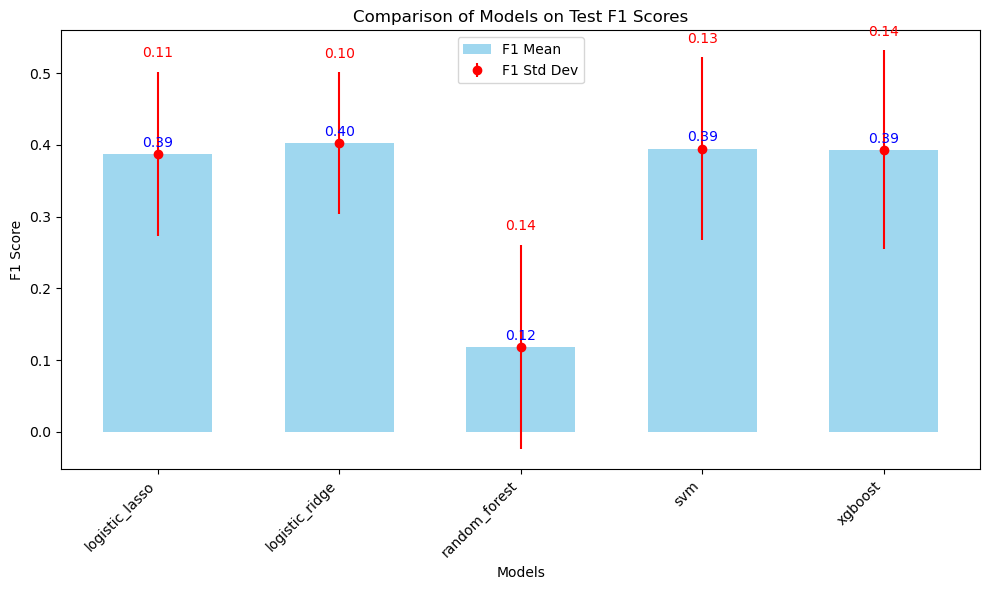

            Model  Average_Score  Avg_Std_Dev  \
0  logistic_lasso       0.387354     0.114555   
1  logistic_ridge       0.402692     0.098473   
2   random_forest       0.118413     0.142512   
3             svm       0.394856     0.127276   
4         xgboost       0.393020     0.138744   

                                         Best_Params  
0      {'model__C': 1, 'model__solver': 'liblinear'}  
1       {'model__C': 0.01, 'model__solver': 'lbfgs'}  
2  {'model__max_depth': 10, 'model__min_samples_l...  
3       {'model__C': 0.1, 'model__kernel': 'linear'}  
4  {'model__learning_rate': 0.1, 'model__max_dept...  


In [107]:

# Plot histogram for model comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.6

plt.bar(x, results_df['Average_Score'], width, label='F1 Mean', color='skyblue', alpha=0.8)
plt.errorbar(x, results_df['Average_Score'], yerr=results_df['Avg_Std_Dev'], fmt='o', color='red', label='F1 Std Dev')

for i, (mean, std_dev) in enumerate(zip(results_df['Average_Score'], results_df['Avg_Std_Dev'])):
    plt.text(i, mean + 0.01, f"{mean:.2f}", ha='center', color='blue')
    plt.text(i, mean + std_dev + 0.02, f"{std_dev:.2f}", ha='center', color='red')

plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Models on Test F1 Scores')
plt.legend()
plt.tight_layout()
plt.show()

print(results_df)


**feature importance**

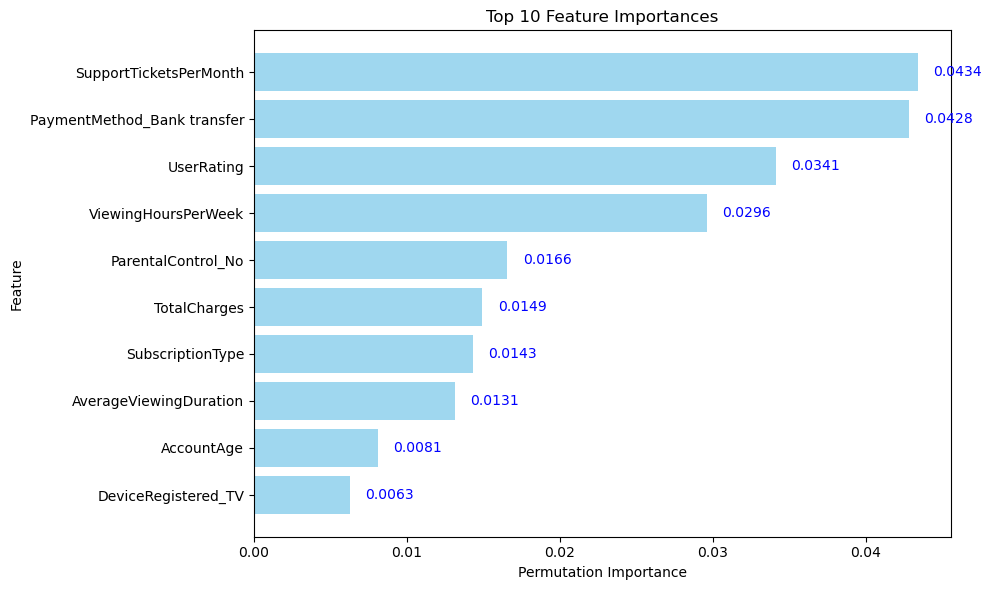

In [109]:
# Feature importance for XGBoost
# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit the preprocessor on the training data
preprocessor.fit(X_train_val)

# Transform both training and test data
X_train_val_transformed = preprocessor.transform(X_train_val)
X_test_transformed = preprocessor.transform(X_test)

# Convert sparse matrices to dense arrays
X_train_val_transformed = X_train_val_transformed.toarray()
X_test_transformed = X_test_transformed.toarray()

# Assuming XGBoost is the best model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_val_transformed, y_train_val)

# Compute permutation importance
perm_importance = permutation_importance(
    xgb_model,
    X_test_transformed,
    y_test,
    scoring='neg_log_loss',
    n_repeats=30,
    random_state=42,
)

# Get the top 10 most important features
sorted_idx = perm_importance.importances_mean.argsort()[-10:][::-1]

# Map column names to the transformed features
feature_names = numerical_features + ordinal_features + list(preprocessor.transformers_[2][1].get_feature_names_out())
top_features = np.array(feature_names)[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, perm_importance.importances_mean[sorted_idx], color='skyblue', alpha=0.8)
for i, v in enumerate(perm_importance.importances_mean[sorted_idx]):
    plt.text(v + 0.001, i, f"{v:.4f}", va='center', color='blue')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



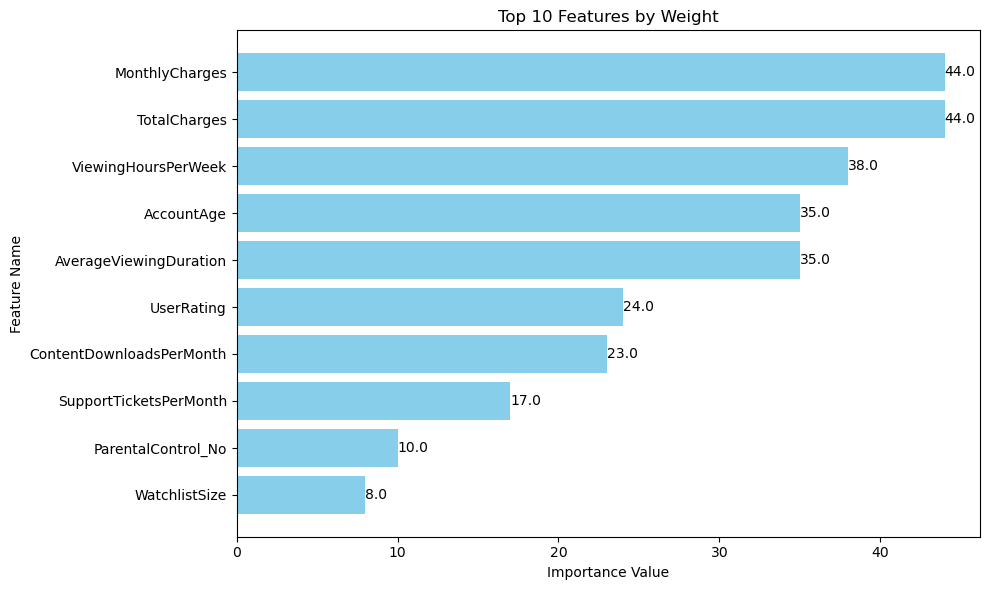

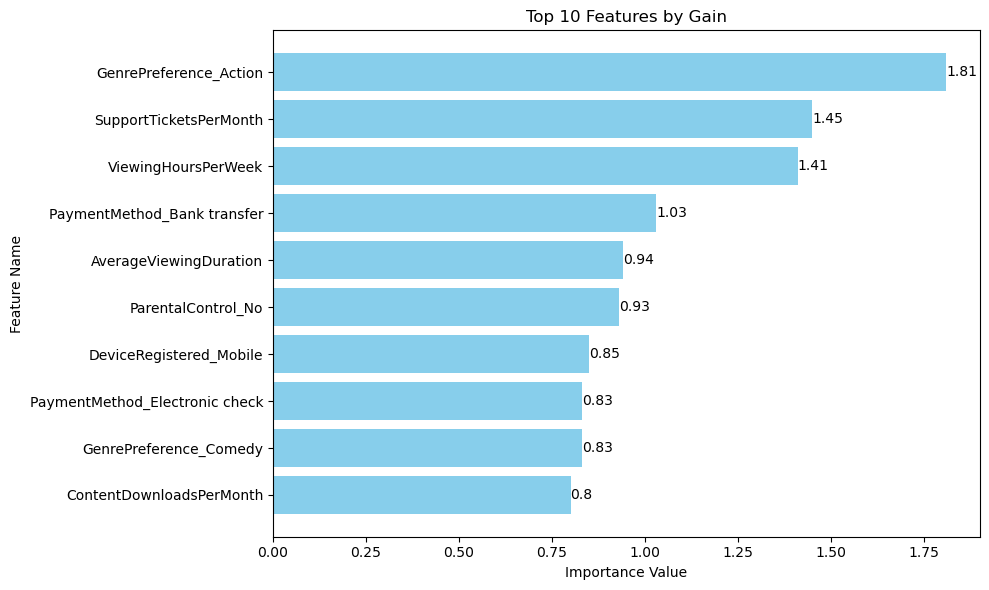

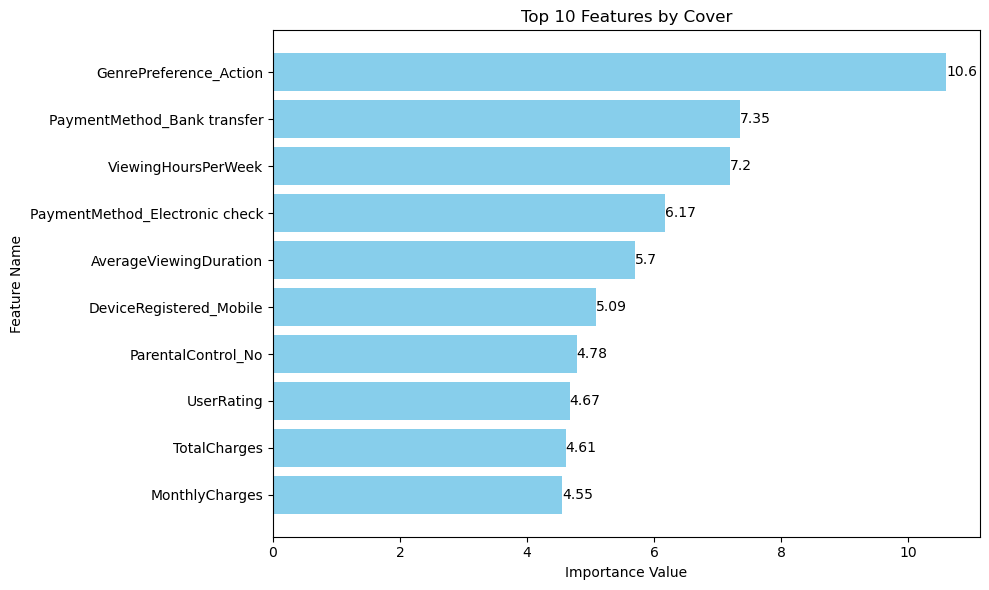

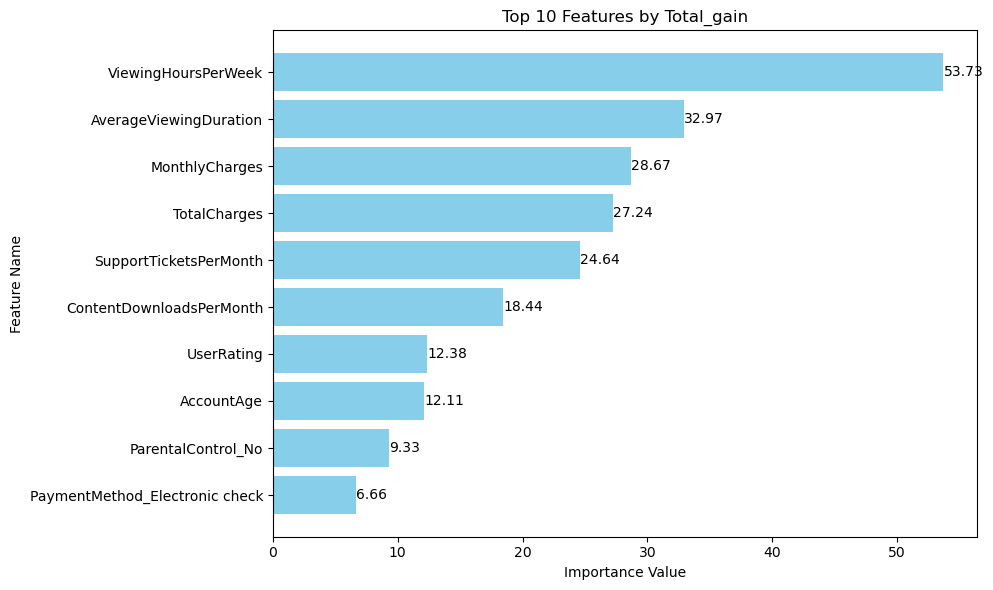

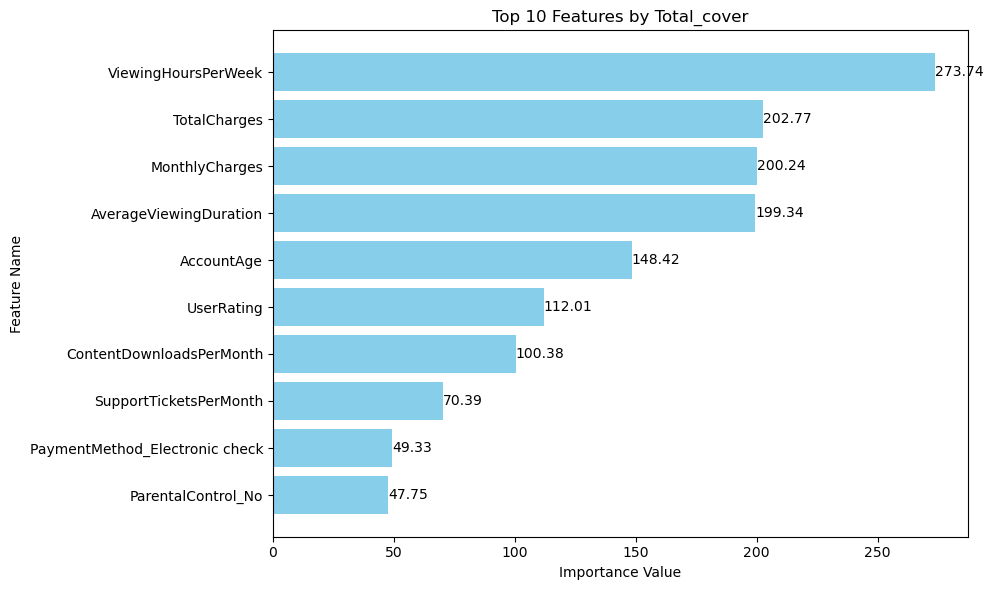

In [130]:
from xgboost import Booster
import matplotlib.pyplot as plt

# Assuming `xgb_model` is your trained XGBoost model
# Get the feature importance for each metric
importance_metrics = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

# Get feature names from the preprocessor
feature_names = numerical_features + ordinal_features + list(
    best_model_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()
)

# Iterate over each metric and create a bar plot
for metric in importance_metrics:
    # Get the feature importance scores
    importance = xgb_model.get_booster().get_score(importance_type=metric)
    
    # Convert to a sorted list of tuples (feature, importance)
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    
    # Extract top 10 features and their importance values
    top_features = [feature_names[int(k[1:])] for k, v in sorted_importance[:10]]  # Map feature indices to names
    top_importance = [round(v, 2) for k, v in sorted_importance[:10]]  # Round values to 2 decimals
    
    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features[::-1], top_importance[::-1], color='skyblue')  # Reverse for descending order
    plt.xlabel('Importance Value')
    plt.ylabel('Feature Name')
    plt.title(f'Top 10 Features by {metric.capitalize()}')
    for i, value in enumerate(top_importance[::-1]):
        plt.text(value, i, str(value), va='center', ha='left', fontsize=10)
    plt.tight_layout()
    plt.show()



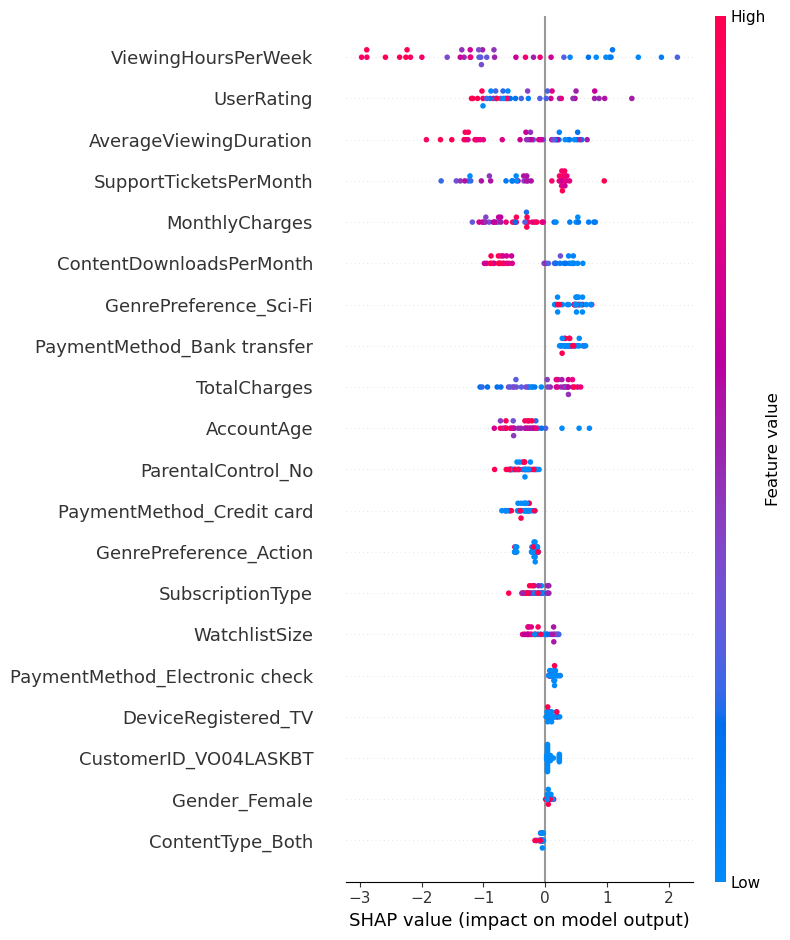

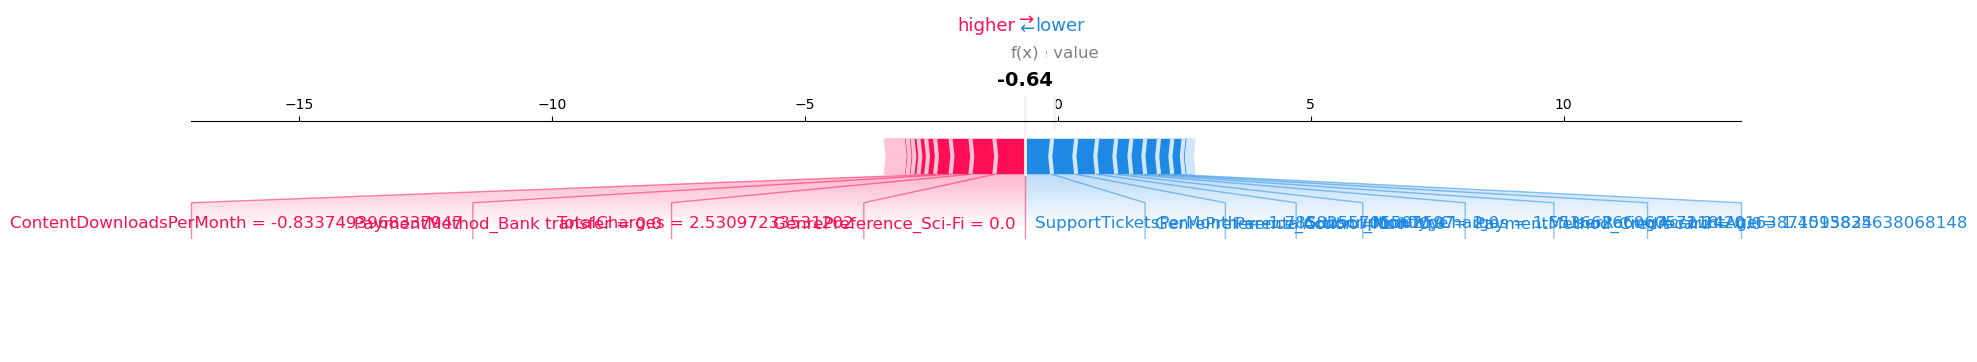

In [119]:
# Transform test data using the preprocessor
X_test_transformed = best_model_pipeline.named_steps['preprocessor'].transform(X_test)

# Convert sparse matrix to dense array
X_test_dense = X_test_transformed.toarray()

# Extract feature names dynamically from the preprocessor
numerical_feature_names = numerical_features
ordinal_feature_names = ordinal_features
categorical_feature_names = best_model_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()

# Combine all feature names
feature_names = numerical_feature_names + ordinal_feature_names + list(categorical_feature_names)

# Ensure feature names match the number of transformed features
assert len(feature_names) == X_test_dense.shape[1], (
    f"Feature names length ({len(feature_names)}) does not match the transformed feature count "
    f"({X_test_dense.shape[1]})."
)

# Create the SHAP explainer
explainer = shap.TreeExplainer(best_model_pipeline.named_steps['model'])

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_dense)

# Summary plot of SHAP values (global importance of features)
shap.summary_plot(shap_values, X_test_dense, feature_names=feature_names)

# Force plot for a specific prediction (local feature importance for one instance)
# Force plot for a specific prediction (local feature importance for one instance)
shap.initjs()  # To enable visualization in Jupyter notebooks




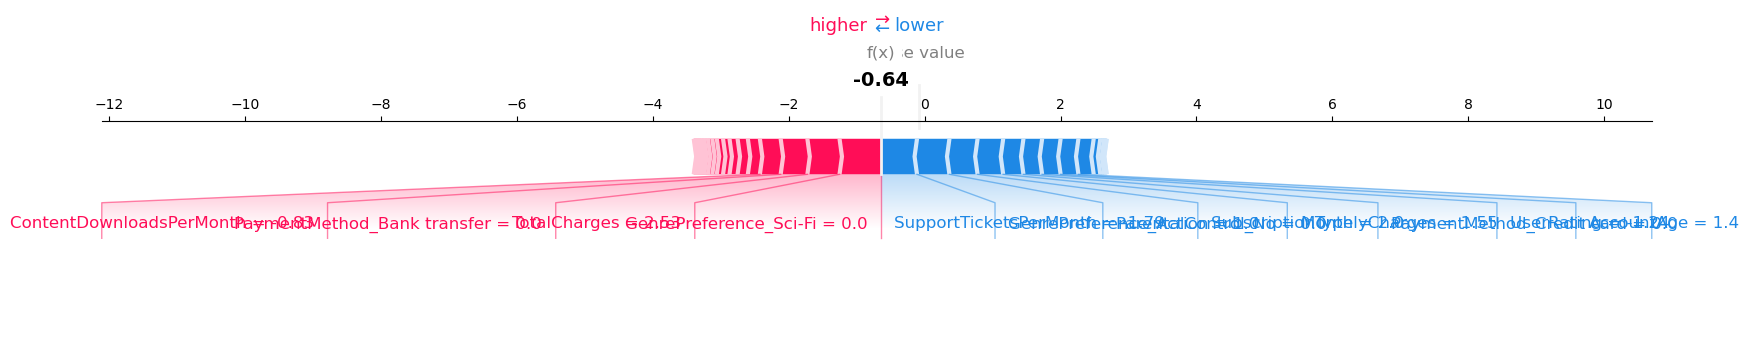

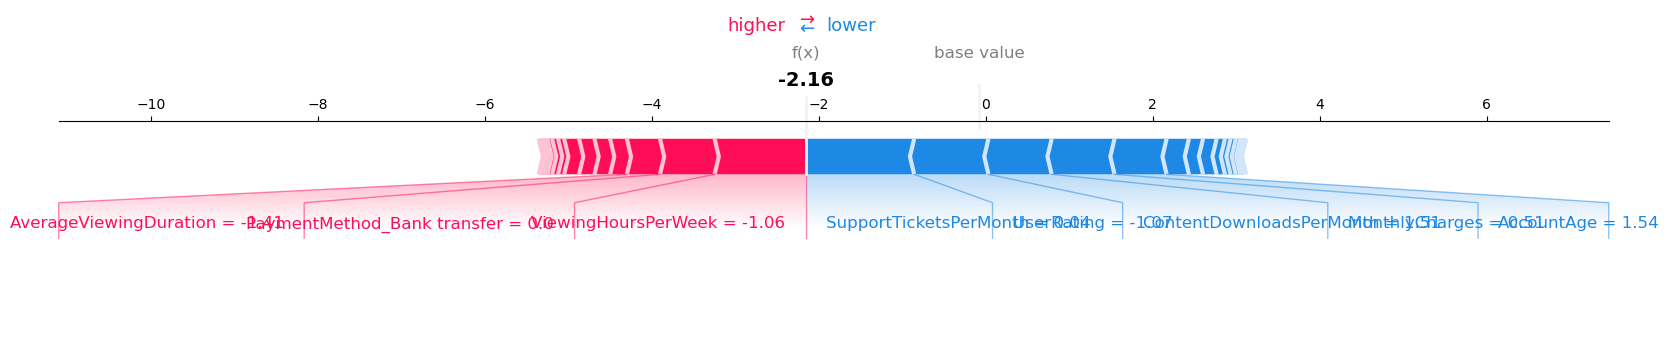

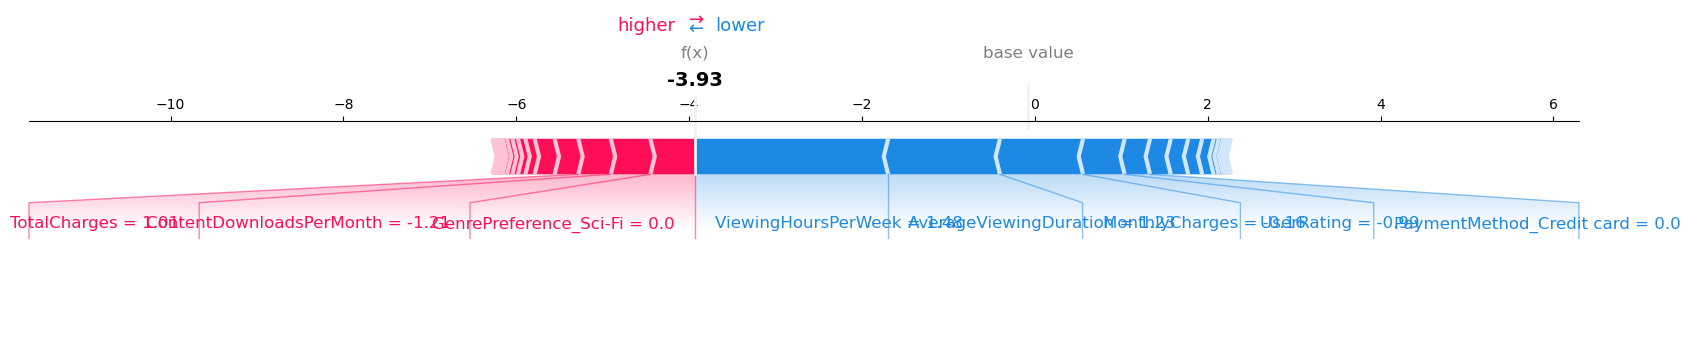

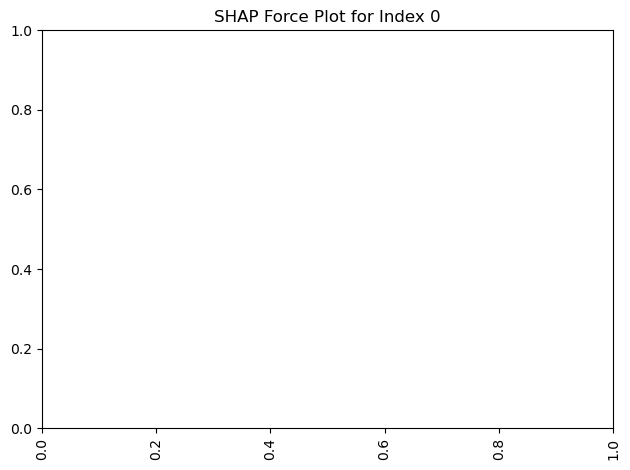

In [125]:
shap.force_plot(
    explainer.expected_value,
    np.round(shap_values[0], 3),        # SHAP values for the first instance rounded to 3 decimals
    X_test_dense[0].round(2),                    # Preprocessed features for the first instance
    feature_names=feature_names,
    matplotlib=True                     # Use matplotlib for a white background
)

shap.force_plot(
    explainer.expected_value,
    np.round(shap_values[20], 3),       # SHAP values for the 20th instance rounded to 3 decimals
    X_test_dense[20].round(2),                   # Preprocessed features for the 20th instance
    feature_names=feature_names,
    matplotlib=True                     # Use matplotlib for a white background
)

shap.force_plot(
    explainer.expected_value,
    np.round(shap_values[30], 3),       # SHAP values for the 30th instance rounded to 3 decimals
    X_test_dense[30].round(2),                   # Preprocessed features for the 30th instance
    feature_names=feature_names,
    matplotlib=True                     # Use matplotlib for a white background
)

